In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
test_size = 50

# 테스트 데이터는 0~49
X_test = X[ : test_size]
y_test = y[ : test_size]

In [4]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [5]:
# 훈련 데이터 50 ~ 149
X_train = X[test_size :]
y_train = y[test_size :]

y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
acc_result = accuracy_score(y_test, pred)
acc_result

0.0

train_test_split 활용하기

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state= 121
)

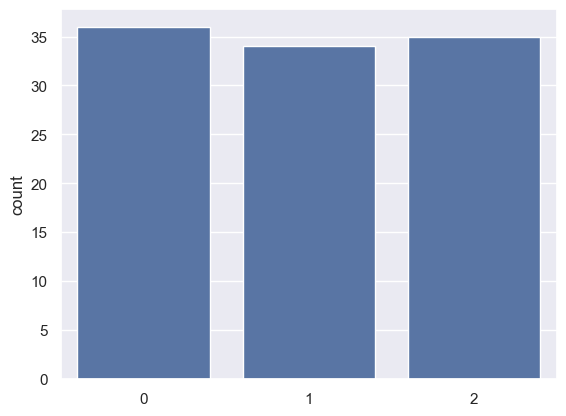

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

sns.countplot(x = y_train)
plt.show()

In [13]:
# KFold : 기계적으로 지정한 k개 만큼 슬라이스
#  if 데이터가 150개 있는 경우 k=3 으로 지정하면..?
#    [0 ~ 49], [50 ~ 99], [100 ~ 149]
#  회귀 문제를 풀 때 사용하는 방식
from sklearn.model_selection import KFold
import numpy as np


In [14]:
# 3개의 폴드 세트로 분리하는 KFold 객체 생성
KFold = KFold(n_splits=3)

In [15]:

# split() 함수를 호출하면 폴드 별 학습용, 검증용 데이터 세트의 인덱스를 array형식으로 리턴
for train_indices, valid_indices in KFold.split(X) :
    print("#######")
    print("훈련 세트의 인덱스 : {}".format(train_indices))
    print("검증 세트의 인덱스 : {}".format(valid_indices))
    print()

#######
훈련 세트의 인덱스 : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#######
훈련 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 1

In [17]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

for train_indices, valid_indices in KFold.split(X):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [18]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits = 3)

for train_indices, valid_indices in skfold.split(X, y) :
    print("######")
    print("검증 세트 인덱스 : {}".format(valid_indices))
    print()
    print("훈련 세트 인덱스 : {}".format(train_indices))
    print("######")

######
검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

훈련 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
######
######
검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

훈련 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44 

In [19]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9400
3 번째 폴드에 대한 평가 결과 : 1.0000

최종 결과 : 0.9733333333333333


- 회귀 모델의 경우 : KFold 사용
- 분류 모델의 경우 : Stratified K-Fold

간단한 교차검증 : cross_val_score

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), # Classifier가 들어가면 자동으로 StratifiedKFold를 사용
    X,
    y,
    scoring = 'accuracy', # 성능 측정 방식. 여기서는 정확도를 사용
    cv = 3 # 폴드의 개수
)

print("폴드 별 정확도 : {}".format(scores))
print("평균 정확도 : {}".format(np.mean(scores)))

폴드 별 정확도 : [0.98 0.94 0.98]
평균 정확도 : 0.9666666666666667


하이퍼 파라미터 튜닝 + 교차 검증 : GridSearchCV

In [44]:
# 모델에 사용할 하이퍼 파라미터 딕셔너리
param_grid = {
    "max_depth" : [1, 2, 3],
    "min_samples_split" : [2, 3]
}

# 총 6개의 모델을 테스트 한다.
# max_depth : 1, min_samples_split : 2
# max_depth : 1, min_samples_split : 3

# max_depth : 2, min_samples_split : 2
# max_depth : 2, min_samples_split : 3

# max_depth : 3, min_samples_split : 2
# max_depth : 3, min_samples_split : 3

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid, # 하이퍼 파라미터 조합 정보가 들어있는 딕셔너리
    return_train_score = True,
    cv = 3, # 각 하이퍼 파라미터 조합으로 만들어진 모델에 대한 교차 검증 폴드의 개수
    n_jobs = -1 # 사용할 CPU의 코어 개수 지정, -1 이면 모든 cpu코어를 사용
)

In [50]:
# 훈련 / 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = y,
    random_state = 121
)

In [52]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [54]:
import pandas as pd
pd.DataFrame(grid_dt_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.000999,7.018853e-07,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
1,0.000667,0.000472,0.000333,4.712580e-04,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
2,0.001000,0.000001,0.000668,4.721581e-04,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
3,0.000328,0.000464,0.000339,4.792378e-04,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
4,0.000000,0.000000,0.000340,4.802493e-04,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785
5,0.000000,0.000000,0.000994,6.924636e-06,3,3,"{'max_depth': 3, 'min_samples_split': 3}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785


In [56]:
print("GridSearchCV 최적의 하이퍼 파라미터 : {}".format(grid_dt_clf.best_params_))
print("GridSearchCV 최고 정확도 : {}".format(grid_dt_clf.best_score_))

GridSearchCV 최적의 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9333333333333332


In [57]:
# 최고의 결과를 냈던 추정기(Estimator) 가져오기
best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [59]:
# GridSearchCV 객체에서 바로 예측하면 자동으로 최고 성능 추정기로 예측
grid_dt_clf.predict(X_test)

array([0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 1, 0])

In [60]:
best_dt_clf.predict(X_test)

array([0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 1, 0])